# Projeto Final Nanodegree em Data Science para Negócios
###### Eric Inohira Uchimura

### Visão Geral


Este estudo faz parte do projeto final para a finalização do curso em Data Science para Negócios ministrada pela Udacity.

Objetivo deste estudo é construir utilizar algoritimos de Machine Learning (aprendizagem de máquina) para identificar pessoas de Interesse (POI) a partir dos emails que se tornaram publico devido ao escandalo da Eron.

Este estudo é dividido em 4 etapas: 
1- Exploração dos dados
2 - Processamentos das Features
3 - Utilização  do Algoritimo de Machine Learning (ML)
5 - Validação do algoritimo

## Exploração dos Dados

Para a exploração de dados, poderíamos transformar os dados fornecedidos em formato 'picke', fazer um script para transformá-lo em csv, carregá-lo no Rstudio e fazer a análise de dados igual ao projeto 2.
Por vias de aprendizado, faremos a análise dos dados utilizando comandos do Python utilizando as bibliotecas gráficas já existentes na linguagem e que serão demonstrado ao longo deste estudo.
Todas os comandos utilizados neste capitulo de exploração de dados foram utilizados o programa "jupyter Notebook" com compilador Python versão 2.

In [2]:
#setando o diretório padrão
import os
os.chdir('C:/Users/eric.uchimura/OneDrive/Udacity/Python - ML/1/final_project/')

In [2]:
from IPython.display import Image
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
import pickle
from sklearn import preprocessing
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from feature_format import featureFormat
from feature_format import targetFeatureSplit



C:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\python27\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ["poi"]

### load the dictionary containing the dataset
data_dict = pickle.load(open("final_project_dataset.pkl", "r") )

Após carregar o arquivo em uma variavel 'data_dict', vamos analisar como está estruturado essa variável

In [28]:
#Quantidade de pessoas
print('Quantidade de Pessoas:  ',len(data_dict.keys()))

('Quantidade de Pessoas:  ', 146)


In [29]:
# Lista os features da base
print (data_dict['METTS MARK'].keys())

['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']


In [30]:
#quantidade de Features
print (len(data_dict['METTS MARK']))

21


Text(0,0.5,u'Bonus')

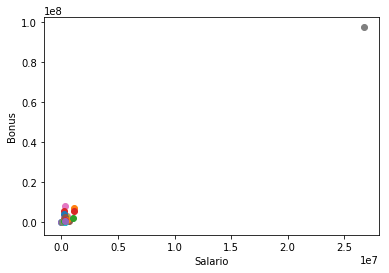

In [31]:
features = ["salary", "bonus"]
#data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features)
### plot features
for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("Salario")
plt.ylabel("Bonus")
#plt.show()

Verificamos pelo gráfico a presença de outliers que poderão influenciar a análise dos dados. 
Vamos percorrer os dados, retirar os valores 'nan', ordenar um vetor com o nome e salario e verificarmos os outliers

In [32]:
features = ["salary", "bonus"]

dados = featureFormat(data_dict, features)

#percorre o vetor e verifica os valores 'nan'
outliers = []
nomesNan = []
for nome in data_dict:
    salario = data_dict[nome]['salary']
    
    if salario == 'NaN':
        nomesNan.append(nome)
    else:outliers.append((nome, (salario)))
#ORDENA O VETOR
outliers_ordenado = sorted(outliers,key=lambda x:x[1],reverse=True)
print(outliers_ordenado)


[('TOTAL', 26704229), ('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321), ('FREVERT MARK A', 1060932), ('PICKERING MARK R', 655037), ('WHALLEY LAWRENCE G', 510364), ('DERRICK JR. JAMES V', 492375), ('FASTOW ANDREW S', 440698), ('SHERRIFF JOHN R', 428780), ('RICE KENNETH D', 420636), ('CAUSEY RICHARD A', 415189), ('KEAN STEVEN J', 404338), ('HAEDICKE MARK E', 374125), ('MCMAHON JEFFREY', 370448), ('METTS MARK', 365788), ('DELAINEY DAVID W', 365163), ('MCCONNELL MICHAEL S', 365038), ('WALLS JR ROBERT H', 357091), ('MARTIN AMANDA K', 349487), ('LAVORATO JOHN J', 339288), ('BUY RICHARD B', 330546), ('OLSON CINDY K', 329078), ('WHITE JR THOMAS E', 317543), ('COX DAVID', 314288), ('KOENIG MARK E', 309946), ('FALLON JAMES B', 304588), ('SHANKMAN JEFFREY A', 304110), ('UMANOFF ADAM S', 288589), ('JACKSON CHARLENE R', 288558), ('COLWELL WESLEY', 288542), ('BOWEN JR RAYMOND M', 278601), ('DONAHUE JR JEFFREY M', 278601), ('KAMINSKI WINCENTY J', 275101), ('GLISAN JR BEN F', 274975), ('LEF

Verifica-se pela lista que existe um elemento chamado 'TOTAL' que deve ser retirado da base de análise.


In [73]:
# quantidade de pessoas com salario igual a NaN
print(len(nomesNan))

51


Retirando os Outliers

In [5]:
data_dict.pop('TOTAL', 0)
data_dict.pop('THE TRAVEL AGENCY IN THE PARK',0)


{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

Verificamos o grafico novamente, sem os outliers

Text(0,0.5,u'Bonus')

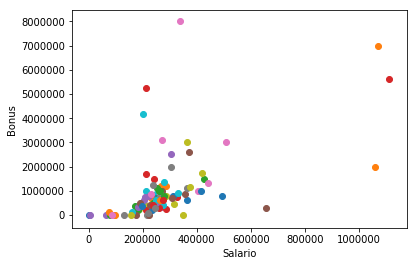

In [77]:
##Plota o grafico sem os outliers
features = ["salary", "bonus"]
#data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features)
### plot features
for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("Salario")
plt.ylabel("Bonus")
#plt.show()

In [34]:
print("Nomes com salário igual a NaN")
print(nomesNan)

Nomes com salário igual a NaN
['CORDES WILLIAM R', 'MEYER ROCKFORD G', 'HORTON STANLEY C', 'GIBBS DANA R', 'LOWRY CHARLES P', 'WALTERS GARETH W', 'CHAN RONNIE', 'BELFER ROBERT', 'WODRASKA JOHN', 'URQUHART JOHN A', 'WHALEY DAVID A', 'HAUG DAVID L', 'MENDELSOHN JOHN', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'DUNCAN JOHN H', 'LEMAISTRE CHARLES', 'PIRO JIM', 'WROBEL BRUCE', 'MEYER JEROME J', 'MCDONALD REBECCA', 'SCRIMSHAW MATTHEW', 'GATHMANN WILLIAM D', 'GILLIS JOHN', 'MORAN MICHAEL P', 'FOY JOE', 'LOCKHART EUGENE E', 'PEREIRA PAULO V. FERRAZ', 'BLAKE JR. NORMAN P', 'SHERRICK JEFFREY B', 'PRENTICE JAMES', 'THE TRAVEL AGENCY IN THE PARK', 'NOLES JAMES L', 'FOWLER PEGGY', 'CHRISTODOULOU DIOMEDES', 'JAEDICKE ROBERT', 'WINOKUR JR. HERBERT S', 'BROWN MICHAEL', 'BADUM JAMES P', 'HUGHES JAMES A', 'BHATNAGAR SANJAY', 'YEAP SOON', 'HIRKO JOSEPH', 'HAYSLETT RODERICK J', 'FUGH JOHN L', 'SAVAGE FRANK', 'GRAMM WENDY L']


Quantidade de POI, total de pagamentos,

In [39]:
contPoi = 0
contPoiPay=0
contPag = 0
contSal = 0 
contEmail = 0

for i in data_dict:
    if data_dict[i]['poi'] == True:
        contPoi = contPoi + 1
        if data_dict[i]['total_payments'] == 'NaN':
            contPoiPay = contPoiPay + 1.0
    if data_dict[i]['total_payments'] == 'NaN':
        contPag = contPag + 1
    if data_dict[i]['salary'] == 'NaN':
        contSal = contSal + 1
    if data_dict[i]['email_address'] == 'NaN':
            contEmail = contEmail + 1
        
        
print 'POIs: ' + str(contPoi)
print 'POI que não há pagamentos: ' + str(contPoiPay)
print 'Qtd de Pessoas com Pagamentos nulos (NaN): ' + str(contPag)
print 'Qtd de Pessoas com Salario igual a NaN: ' + str(contSal)
print 'Qtd de Pessoas sem endereço de email: ' + str(contEmail)            
            

POIs: 18
POI que não há pagamentos: 0
Qtd de Pessoas com Pagamentos nulos (NaN): 21
Qtd de Pessoas com Salario igual a NaN: 51
Qtd de Pessoas sem endereço de email: 34


Plotaremos a seguir um scatterplot dos bonus x salário para verificar se os POIs possuem maior bonus/salario.
Usaremos o ggplot e para isso teremos que transformar os dados em formato Pandas.

In [6]:
import pandas as pd

data_dict_panda = pd.DataFrame(data_dict)
data_dict_panda =data_dict_panda.T



C:\python27\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\python27\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\python27\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


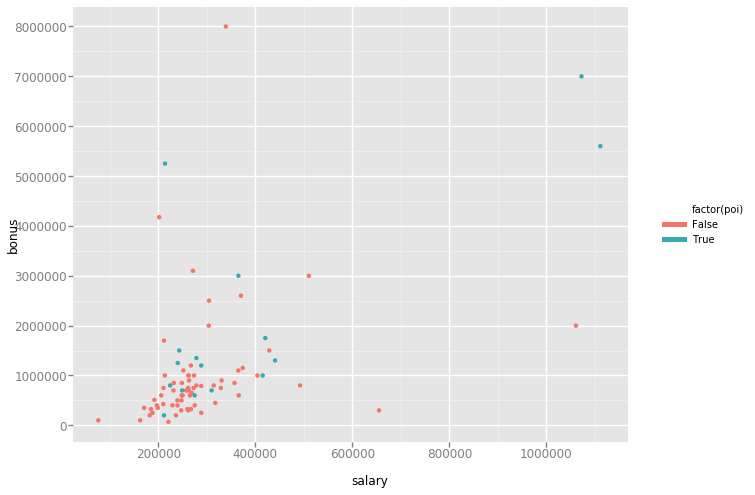

<ggplot: (2570895)>


In [6]:
## Plota bonus x Salario com diferenciação nos POIs
from ggplot import *

data_dict_panda = data_dict_panda.fillna(value = 0)
print ggplot(data_dict_panda, aes(x = 'salary',y = 'bonus', colour = 'factor(poi)')) + geom_point() 

Nota-se pelo gráfico que há outlier que não é POI, possui um salário alto com um bonus 'mediano' e salario 'baixo' e bonus alto.
Para os POIs ve-se dois outliers no extremo (alto salario e alto bonus).


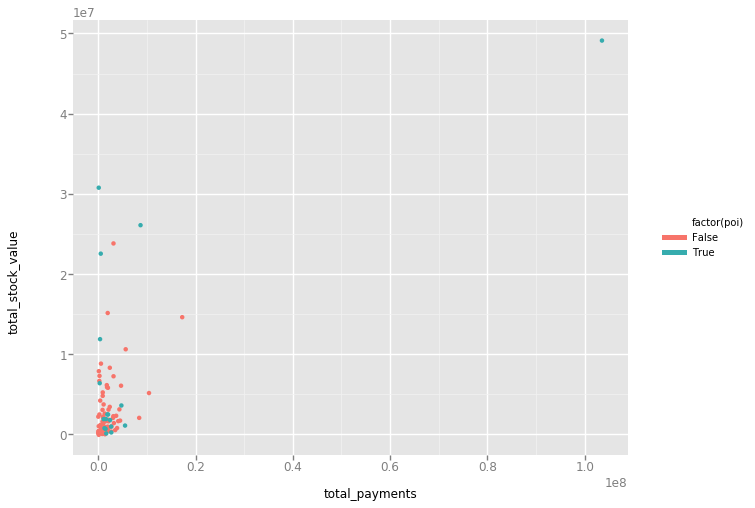

<ggplot: (15083241)>


In [53]:
# Plota total de pagamentos x valor das açoes
print ggplot(data_dict_panda, aes(x = 'total_payments',y = 'total_stock_value', colour = 'factor(poi)')) + geom_point()

NOta-se que no "primeiro quadrante" (total_payments até 0.2 e tota_stock_value até 1) temos os POIS e não POIs todos misturados. Encontra-se um POI outlier no extremo direito do scatterplot.

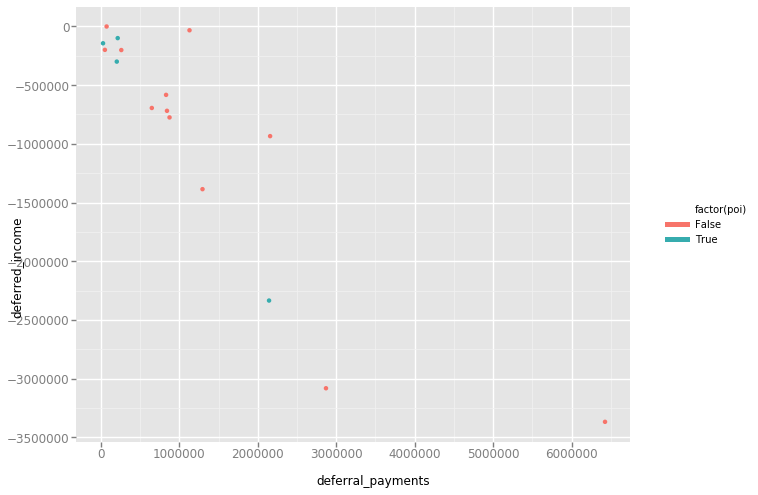

<ggplot: (14573925)>


In [54]:
# Plota total de deferral_payments x deferred_income
print ggplot(data_dict_panda, aes(x = 'deferral_payments',y = 'deferred_income', colour = 'factor(poi)')) + geom_point()

Verifica-se que valores baixos no eixo Y contem apenas não POI e valores próximos a zero ficam inconclusivos a classificação.

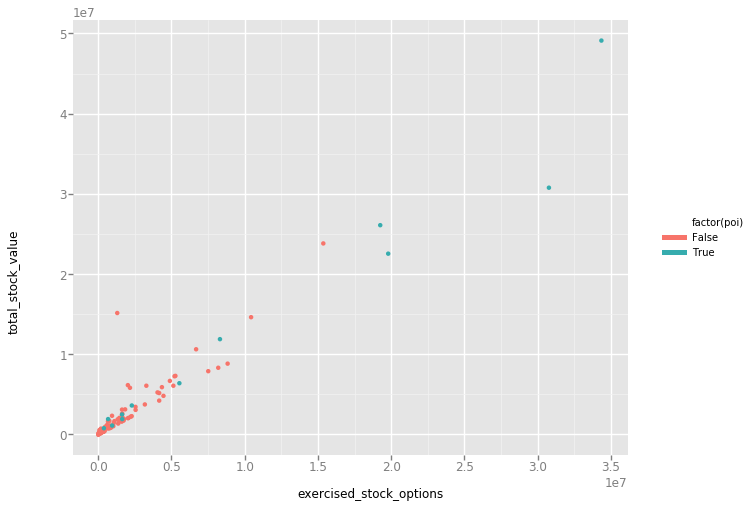

<ggplot: (18888983)>


In [55]:
# Plota exercised_stock_options x total stock Value
print ggplot(data_dict_panda, aes(x = 'exercised_stock_options',y = 'total_stock_value', colour = 'factor(poi)')) + geom_point()

Observa-se que as duas variaveis possuem uma boa relaçao linear, próximo a uma reta. Os outliers podemos classifica-los como POI.

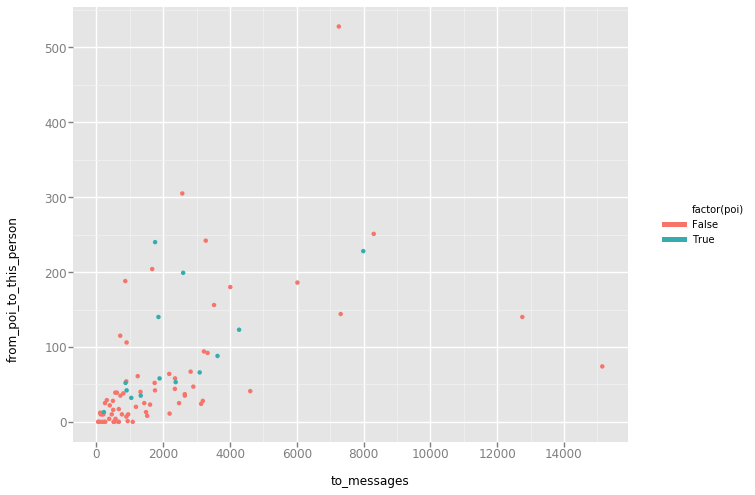

<ggplot: (14967137)>


In [56]:
# Plota exercised_stock_options x total stock Value
print ggplot(data_dict_panda, aes(x = 'to_messages',y = 'from_poi_to_this_person', colour = 'factor(poi)')) + geom_point()

Pequena incidencia de POI com valores pequenos no eixo x e y. com valores maiores de 2000 (to_menssages) e 100 (from_poi_to_this_person) verifica-se uma distribuição inconclusiva.

## Processamento das Features
Para o processamento das Features, criaremos duas novas caracteristicas que serão apresentadas a seguir.

### Criação de Features (atributos)

Criaremos dois novos atributos chamados por_email_from_Poi e por_email_to_POI.
Testaremos a hipótese de que as pessoas de interesse trocam mais emails entre si, uma vez que o esquema de corrupção envolvia um grupo e esse grupo deveria se comunicar com mais frequencia entre si.
Para a formula desse novo atributo temos:





$$por\_from\_poi =\frac{numero\ de\ emails\ recebidos\ de\ um\ POI}{total\ de\ mensagens\ recebidas}$$


$$por\_to\_poi = \frac{numero\ de\ emails\ enviados\ de\ um\ POI}{total\ de\ mensagens\ enviadas}$$


In [7]:
#Criação de novos features
for nome in data_dict:
    #por_from_poi
    emails_recebidos = data_dict[nome]['from_poi_to_this_person']
    tot_emails_recebidos = data_dict[nome]['to_messages']
    
    if emails_recebidos == 'NaN' or tot_emails_recebidos =='NaN':
        data_dict[nome]['por_from_poi'] = 0.0
    else:
        data_dict[nome]['por_from_poi'] = float(emails_recebidos)/float(tot_emails_recebidos)
            
    #por_to_poi
    emails_enviados = data_dict[nome]['from_this_person_to_poi']
    tot_emails_enviados = data_dict[nome]['from_messages']
    
    if emails_enviados == 'NaN' or tot_emails_enviados =='NaN':
        data_dict[nome]['por_to_poi'] = 0.0
    else:
        data_dict[nome]['por_to_poi'] = float(emails_enviados)/float(tot_emails_enviados)
    

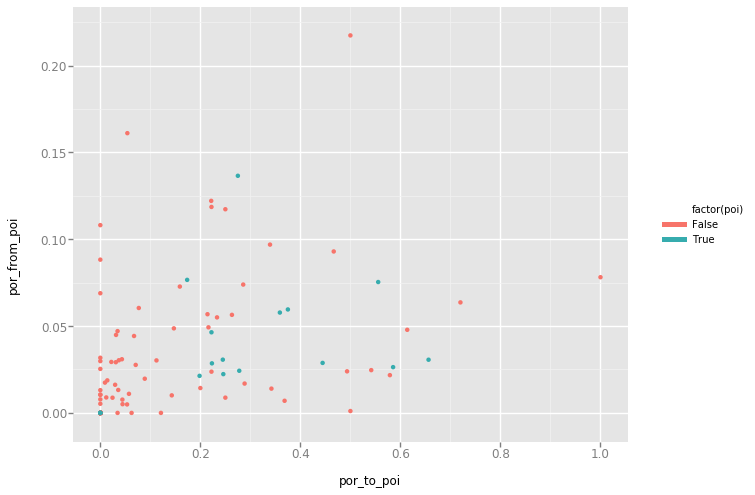

<ggplot: (18211185)>


In [8]:
## plotando o grafico dos novos atributos
data_dict_panda = pd.DataFrame(data_dict)
data_dict_panda =data_dict_panda.T

print ggplot(data_dict_panda, aes(x = 'por_to_poi',y = 'por_from_poi', colour = 'factor(poi)')) + geom_point()

### Selecao de Features

Para rodar o algoritimo de seleção de features foram removidas as que continham NaN em mais de 50% das ocorrencias.



In [3]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [6]:
import pandas as pd
data_panda = pd.DataFrame.from_dict(data_dict, orient='index')

In [10]:
retirados = data_panda.describe().transpose().sort_values(['freq'], ascending=False) 

Serão retirados as seguintes features (menos o POI) por representar Mais que 50% de NAN:

In [15]:
retirados.head(7)

,count,unique,top,freq
loan_advances,146,5,NaN,142
director_fees,146,18,NaN,129
restricted_stock_deferred,146,19,NaN,128
poi,146,2,False,128
deferral_payments,146,40,NaN,107
deferred_income,146,45,NaN,97
long_term_incentive,146,53,NaN,80


In [9]:
from sklearn.feature_selection import SelectKBest, f_classif

features_list = ["poi", "bonus", "exercised_stock_options", "expenses", "other", "restricted_stock", "salary", 
                  "shared_receipt_with_poi", "total_payments", "total_stock_value", "por_to_poi",
                 "por_from_poi"]

data = featureFormat(data_dict, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(features, labels)


SelectKBest(k=5, score_func=<function f_classif at 0x120CDBF0>)

In [11]:
# organiza os resultados em uma planilha panda
feat_score = pd.DataFrame(selector.scores_)
feat_score.insert(loc=0,column='features',value=features_list[1:])
feat_score.columns=['Features','KBest Score']
feat_score.sort_values(by=['KBest Score'])

,Features,KBest Score
10,por_from_poi,3.210762
3,other,4.204971
2,expenses,6.234201
6,shared_receipt_with_poi,8.746486
7,total_payments,8.866722
4,restricted_stock,9.346701
9,por_to_poi,16.641707
5,salary,18.575703
0,bonus,21.060002
8,total_stock_value,24.467654


### PCA

Foram utilizados o algoritimo PCA (Principal Component Analysis) que foram inseridos como parametro no GridSearch:

Principal Components Analysis (```PCA```) : ```n_components```, ```whiten```

Para os classificadores RAndom Forest e Decision Tree foram retirados os parametros de PCA por motivo de desempenho.

## Classificadores
Para todos os classificadores foram gerados uma procedure (def) para cada. Na biblioteca p5aux.py temos funções de auxilio e que foram citadas no estudo exploratório. Também foi realizado modificações no arquivo tester.py para que possamos imprimir os resultados dos classificadores de uma forma mais organizada.
A Seguir explicaremos procedures (def) por procedures utilizados no programa.



### P5aux.py

Para melhor organização do código foi criado uma biblioteca chamada P5aux que contem as seguintes funções:

In [1]:
## Remove os outliers dos dados
def remove_outliers(data_dict):
    data_dict.pop('TOTAL',0)
    data_dict.pop('THE TRAVEL AGENCY IN THE PARK',0)


In [2]:
#Criação de novos features - 'por_from_poi' e 'por_to_poi'
# retorna os dados com as novas features
def cria_atributos(data_dict):
    for nome in data_dict:
    #por_from_poi
        emails_recebidos = data_dict[nome]['from_poi_to_this_person']
        tot_emails_recebidos = data_dict[nome]['to_messages']

        if emails_recebidos == 'NaN' or tot_emails_recebidos =='NaN':
            data_dict[nome]['por_from_poi'] = 0.0
        else:
            data_dict[nome]['por_from_poi'] = float(emails_recebidos)/float(tot_emails_recebidos)

        #por_to_poi
        emails_enviados = data_dict[nome]['from_this_person_to_poi']
        tot_emails_enviados = data_dict[nome]['from_messages']

        if emails_enviados == 'NaN' or tot_emails_enviados =='NaN':
            data_dict[nome]['por_to_poi'] = 0.0
        else:
            data_dict[nome]['por_to_poi'] = float(emails_enviados)/float(tot_emails_enviados)

    return data_dict

In [3]:
# lista todos os features contida nos dados
# retorna uma lista de featuers com o 'poi' no inicio da lista
def todos_features (data_dict):

    features_list = data_dict['SKILLING JEFFREY K'].keys()
    features_list.remove('email_address')
    features_list.remove('poi')
    features_list = ['poi'] + features_list
    return features_list


In [4]:
# retorna os k melhores features dado de entrada um data set,
# lista de features e numero de k.

def k_best(data_dict, features_list, k):

    data = featureFormat(data_dict, features_list)
    labels, features = targetFeatureSplit(data)

    kbest = SelectKBest(f_classif, k=k)
    kbest.fit(features, labels)

    feature_list = zip(features_list[1:], kbest.scores_)
    ordenado = sorted(feature_list, key=lambda x: x[1], reverse=True)
    k_best_features = dict(ordenado[:k])
    return ['poi'] + k_best_features.keys()


In [5]:
#funcao que imprime o resultado do gridsearch
# em uma tabela prettytable
import prettytable
from prettytable import ALL as ALL

def imprime_resultado(tabela, gridsearch, parametros, nome):
    pars = ""
    melhor_resultado = gridsearch.best_estimator_.get_params()
    for nome_parametro in sorted(parametros.keys()):
        pars = pars + nome_parametro + ': ' + str(melhor_resultado[nome_parametro]) +'\n'


    tabela.add_row([nome, gridsearch.best_score_, pars])


In [6]:
# inicia uma tabela de resultado - prettytable
def inicia_resultado():
    tab = prettytable.PrettyTable(hrules=ALL)
    tab.field_names = ['Classificador', 'Pontuacao', 'Atributos']
    return tab

def inicia_tabela_testes():
    tab = prettytable.PrettyTable(hrules=ALL)
    tab.add_column ("Classificador",['Accuracy', 'Precision', 'Recal', 'f1', 'f2', 'Total Predictions', 'true_positives','false Positives', 'false Negatives', 'true_negatives'])
    return tab


In [ ]:
def inicia_pandas_testes():

    nomes = ['Classificador',
             'k',
             'Accuracy',
             'Precision',
             'Recal',
             'f1',
             'f2',
             'Total Predictions',
             'true_positives',
             'false Positives',
             'false Negatives',
             'true_negatives']
    tab_panda = pd.DataFrame(columns = nomes)
    return tab_panda

# insere na tabela os valores
def insere_panda(tabela, nome, listadados,k):
    a = listadados
    a.insert(0,k)
    a.insert(0,nome)
    tabela.loc[len(tabela.index)+1] = a
    return tabela


### testador.py

Foi feito uma cópia do arquivo tester.py (fornecido pelo curso) e foi modificado a função test_classifier que ao inves de imprimir na tela os resultados, a função agora retorna uma lista dos resultados para que possa ser visualizada de uma forma mais organizada.

In [ ]:
   ## código inserido
        saida = [accuracy,precision,recall,f1,f2,total_predictions,true_positives,false_positives,false_negatives,true_negatives]
        return saida
   ## código retirado
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""


## poi_id.py

Este é o principal arquivo que contém os classificadores, ajustes de parametros e os testes. Este programa, imprime em forma de planilha todos os ajustes realizados e o resultado dos testes utilizando a biblioteca testador.py
Para a versão de entrega, foram comentados a execução de todos os testes, deixando apenas a execução do melhor classificador.


Além das bibliotecas dos classificadores foram utilizadas as bibliotecas criadas (citadas neste estudo) e a biblioteca prettytable responsável em uma visualização mais amigável dos resultados.

In [1]:
import sys
import pickle
sys.path.append("../tools/")

import p5aux #Biblioteca auxiliar criado por Eric.
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
import testador # Baseado no arquivo tester.py fornecido pela udacity

from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.grid_search import GridSearchCV

import prettytable
from prettytable import ALL as ALL


C:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\python27\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Leitura das variáveis e retirada dos outliers

In [2]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.

#Chama função que está na biblioteca criada: p5aux.py
#remove os outliers Total e 'the traval agency in the park'
p5aux.remove_outliers(data_dict)

# cria os atributos 'por_from_poi' e 'por_to_poi'
p5aux.cria_atributos(data_dict)

my_dataset = data_dict

features_list = p5aux.inicia_features()

features_list_limpo = p5aux.inicia_features_limpo()




Trabalha os dados para inserir nos classificadores.

In [3]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

## divide a amostragem entre treino e tester
features_train, features_test, labels_train, labels_test = train_test_split(
                    features,
                     labels,
                     test_size=0.3,
                     random_state=60)
cv = StratifiedShuffleSplit(labels_train,
                                   100,
                                   test_size=0.2,
                                   random_state=60)


>Porém, não ficou muito claro pra mim se esse "retorna em camadas" está falando sobre a diferença entre o stratified e o train_test_split. Poderia deixar mais claro o que é feito no Stratified?

O "retorna em camadas" foi apenas um desleixo na tradução encontrada na documentação. Folds = camadas = diretório.
De acordo com a documentaçao, ele é um merge entre stratifiedkfold e o shuffleSplit. Segue documentação do algoritimo, caso necessite de mais detalhes: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

"Stratified ShuffleSplit cross-validator
Provides train/test indices to split data in train/test sets.
This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.
Note: like the ShuffleSplit strategy, stratified random splits do not guarantee that all folds will be different, although this is still very likely for sizeable datasets."

<span style="color:red">  Correção: Para dividir os dados entre teste e treinamento foi utilizado o algorimito 'StratifiedShuffleSplit' que retorna em camadas de forma randomizada os dados de teste e treinamento. Foi utilizado como parametro o test_size=0.2 que significa que 20% dos dados vão para teste e o restante (80%) será usado para treinamento.  </span>

Tabela prettytable e panda para imprimir os resultados

In [4]:
### cria uma tabela de resultados
tabela_resultado = p5aux.inicia_resultado()
tabela_teste = p5aux.inicia_tabela_testes()

tabela_panda = p5aux.inicia_pandas_testes()

## Classificadores

Para cada classificador, foi criado uma procedure de forma a organizar melhor o código e realizar testes de forma mais prática. Em todos os classificadores foi utilizado o GRIDSEARCH para acharmos os melhores parametros de entrada.

#### Logistic Regression

In [6]:
def classificador_logistic_regression():

    kb = SelectKBest()
    pca = PCA()
    clf_lr = LogisticRegression()

    pipe_lr = Pipeline(steps=[("SKB", kb), ("PCA", pca),
                              ("LogisticRegression", clf_lr)])

    lr_k = {"SKB__k": range(9, 10)}
    lr_params = {'LogisticRegression__C': [1e-08, 1e-07, 1e-06],
                 'LogisticRegression__tol': [1e-2, 1e-3, 1e-4],
                 'LogisticRegression__penalty': ['l1', 'l2'],
                 'LogisticRegression__random_state': [42, 46, 60]}
    lr_pca = {"PCA__n_components": range(3, 8), "PCA__whiten": [True, False]}

    lr_k.update(lr_params)
    lr_k.update(lr_pca)
    ## inicia o gridsearch
    grid_search = GridSearchCV(pipe_lr,
                               lr_k,
                               n_jobs=-1,
                               cv=cv,
                               scoring='f1')
    grid_search.fit(features_train, labels_train)
    #imprime resultados em uma tabela
    p5aux.imprime_resultado(tabela_resultado,
                            grid_search,
                            lr_k,
                            "Logistic Regression")


In [7]:
classificador_logistic_regression()

In [8]:
print(tabela_resultado)

+---------------------+----------------+--------------------------------------+
|    Classificador    |   Pontuacao    |              Atributos               |
+---------------------+----------------+--------------------------------------+
| Logistic Regression | 0.285302031302 |     LogisticRegression__C: 1e-06     |
|                     |                |   LogisticRegression__penalty: l1    |
|                     |                | LogisticRegression__random_state: 42 |
|                     |                |    LogisticRegression__tol: 0.01     |
|                     |                |         PCA__n_components: 7         |
|                     |                |          PCA__whiten: False          |
|                     |                |              SKB__k: 9               |
|                     |                |                                      |
+---------------------+----------------+--------------------------------------+


#### SVC - Suport Vector Classifier

In [9]:
def classificador_svc():
    # inicia as variaveis
    kb = SelectKBest()
    pca = PCA()
    clf_svc = SVC()
    # seta os parametros
    pipe_svc = Pipeline(steps=[("SKB", kb), ("PCA", pca), ("SVC", clf_svc)])

    svc_k = {"SKB__k": range(8, 10)}
    svc_pca = {"PCA__n_components": range(3, 8), "PCA__whiten": [True, False]}
    svc_params = {'SVC__C': [1000],
                  'SVC__gamma': [0.001],
                  'SVC__kernel': ['rbf']}
    svc_k.update(svc_params)
    svc_k.update(svc_pca)
    grid_search = GridSearchCV(pipe_svc,
                               svc_k,
                               n_jobs=-1,
                               cv=cv,
                               scoring='f1')
    grid_search.fit(features_train, labels_train)

    p5aux.imprime_resultado(tabela_resultado,
                            grid_search,
                            svc_k,
                            "Suport Vector Classifier")


In [10]:
classificador_svc()

In [11]:
print(tabela_resultado[1])

+--------------------------+-----------------+----------------------+
|      Classificador       |    Pontuacao    |      Atributos       |
+--------------------------+-----------------+----------------------+
| Suport Vector Classifier | 0.0991904761905 | PCA__n_components: 7 |
|                          |                 |  PCA__whiten: True   |
|                          |                 |      SKB__k: 9       |
|                          |                 |     SVC__C: 1000     |
|                          |                 |  SVC__gamma: 0.001   |
|                          |                 |   SVC__kernel: rbf   |
|                          |                 |                      |
+--------------------------+-----------------+----------------------+


#### Decision Tree

In [12]:
def classificador_decision_tree():

    kb = SelectKBest()
    pca = PCA()
    clf_dt = DecisionTreeClassifier()

    pipe = Pipeline(steps=[("SKB", kb),
                           ("PCA", pca),
                           ("DecisionTreeClassifier",
                           clf_dt)])

    dt_k = {"SKB__k": range(8, 10)}
    dt_params = {"DecisionTreeClassifier__min_samples_leaf": [2, 6, 10, 12],
                 "DecisionTreeClassifier__min_samples_split": [2, 6, 10, 12],
                 "DecisionTreeClassifier__criterion": ["entropy", "gini"],
                 "DecisionTreeClassifier__max_depth": [None, 5],
                 "DecisionTreeClassifier__random_state": [42, 46, 60]}
    dt_pca = {"PCA__n_components": range(4, 7), "PCA__whiten": [True, False]}

    dt_k.update(dt_params)
    dt_k.update(dt_pca)

#    enron.get_best_parameters_reports(pipe, dt_k, features, labels)
    grid_search = GridSearchCV(pipe,
                               dt_k,
                               n_jobs=-1,
                               cv=cv,
                               scoring='f1')
    grid_search.fit(features_train, labels_train)
    p5aux.imprime_resultado(tabela_resultado, grid_search, dt_k,"Decision Tree")


In [13]:
classificador_decision_tree()

In [14]:
tabela_resultado.align = 'l'
tabela_resultado.format = True

In [15]:
print(tabela_resultado[2])

+---------------+----------------+----------------------------------------------+
| Classificador | Pontuacao      | Atributos                                    |
+---------------+----------------+----------------------------------------------+
| Decision Tree | 0.133277777778 | DecisionTreeClassifier__criterion: gini      |
|               |                | DecisionTreeClassifier__max_depth: None      |
|               |                | DecisionTreeClassifier__min_samples_leaf: 2  |
|               |                | DecisionTreeClassifier__min_samples_split: 6 |
|               |                | DecisionTreeClassifier__random_state: 42     |
|               |                | PCA__n_components: 4                         |
|               |                | PCA__whiten: True                            |
|               |                | SKB__k: 8                                    |
|               |                |                                              |
+---------------

#### Random Forest
Para o Random Forest foram retirados o PCA por motivos de desempenho.


In [16]:
def classificador_random_forest():

    kb = SelectKBest()
    clf_rf = RandomForestClassifier()

    pipe_rf = Pipeline(steps=[("SKB", kb), ("RandomForestClassifier", clf_rf)])

    rf_k = {"SKB__k": range(8, 11)}
    rf_params = {'RandomForestClassifier__max_depth': [None, 5, 10],
                  'RandomForestClassifier__n_estimators': [10, 15, 20, 25],
                  'RandomForestClassifier__random_state': [42, 46, 60]}

    rf_k.update(rf_params)

#    enron.get_best_parameters_reports(pipe_rf, rf_k, features, labels)
    grid_search = GridSearchCV(pipe_rf,
                               rf_k,
                               n_jobs=-1,
                               cv=cv,
                               scoring='f1')
    grid_search.fit(features_train, labels_train)

    p5aux.imprime_resultado(tabela_resultado,
                            grid_search,
                            rf_k,
                            "Random Forest")


In [17]:
classificador_random_forest()

In [18]:
print(tabela_resultado[3])

+---------------+-----------+------------------------------------------+
| Classificador | Pontuacao | Atributos                                |
+---------------+-----------+------------------------------------------+
| Random Forest | 0.105     | RandomForestClassifier__max_depth: 5     |
|               |           | RandomForestClassifier__n_estimators: 15 |
|               |           | RandomForestClassifier__random_state: 60 |
|               |           | SKB__k: 8                                |
|               |           |                                          |
+---------------+-----------+------------------------------------------+


#### Ada Boost

Para o Adaboost foram retirados o PCA por motivos de desempenho.

In [19]:
def classificador_ada_boost():

    kb = SelectKBest()
    clf_ab = AdaBoostClassifier()

    pipe_ab = Pipeline(steps=[("SKB", kb), ("AdaBoostClassifier", clf_ab)])

    ab_k = {"SKB__k": range(8, 11)}
    ab_params = {'AdaBoostClassifier__n_estimators': [10, 20, 30, 40],
                 'AdaBoostClassifier__algorithm': ['SAMME', 'SAMME.R'],
                 'AdaBoostClassifier__learning_rate': [.8, 1, 1.2, 1.5]}

    ab_k.update(ab_params)

    grid_search = GridSearchCV(pipe_ab,
                               ab_k,
                               n_jobs=-1,
                               cv=cv,
                               scoring='f1')
    grid_search.fit(features_train, labels_train)
    p5aux.imprime_resultado(tabela_resultado, grid_search,ab_k,"Ada Boost")


In [20]:
classificador_ada_boost()

In [21]:
print(tabela_resultado[4])

+---------------+----------------+----------------------------------------+
| Classificador | Pontuacao      | Atributos                              |
+---------------+----------------+----------------------------------------+
| Ada Boost     | 0.156412698413 | AdaBoostClassifier__algorithm: SAMME.R |
|               |                | AdaBoostClassifier__learning_rate: 1.2 |
|               |                | AdaBoostClassifier__n_estimators: 30   |
|               |                | SKB__k: 8                              |
|               |                |                                        |
+---------------+----------------+----------------------------------------+


## Testes dos classificadores

Para o teste dos classificadores foram utilizados os parametros encontrados no GridSearch. Foi modificado o algoritimo de testes fornecido pela Udacity para que a saida seja realizada via "lista". Com isso ficará mais fácil a visualização dos resultados.
Novamente, para cada teste foi criado uma procedure (def) que será explicitado a seguir.

#### Logistic Regression

In [7]:
def teste_logistic_regression():

    kbest_features = p5aux.k_best(my_dataset, features_list, 9)
    clf_lr = Pipeline(steps=[('scaler',
                                StandardScaler()),
                                ('pca',
                                PCA(n_components=7, whiten=False)),
                                    ('classifier',
                                    LogisticRegression(tol=0.01,
                                                       C=1e-06,
                                                       penalty='l2',
                                                       random_state=42))])
    lista = testador.test_classifier(clf_lr, my_dataset, kbest_features)

    #tabela_teste.add_column ("Logistic Regression",lista)


In [8]:
teste_logistic_regression()

In [39]:
def teste_logistic_regression():

    kbest_features = p5aux.k_best(my_dataset, features_list, 9)
    clf_lr = Pipeline(steps=[('scaler',
                                StandardScaler()),
                                ('pca',
                                PCA(n_components=4, whiten=False)),
                                    ('classifier',
                                    LogisticRegression(tol=0.001,
                                                       C=1e-08,
                                                       penalty='l2',
                                                       random_state=42))])
    lista = testador.test_classifier(clf_lr, my_dataset, kbest_features)

    tabela_teste.add_column ("Logistic Regression",lista)

In [49]:
teste_logistic_regression()

In [50]:
print(tabela_teste)

+-------------------+---------------------+
|   Classificador   | Logistic Regression |
+-------------------+---------------------+
|      Accuracy     |    0.832066666667   |
+-------------------+---------------------+
|     Precision     |    0.380359612725   |
+-------------------+---------------------+
|       Recal       |        0.4125       |
+-------------------+---------------------+
|         f1        |    0.395778364116   |
+-------------------+---------------------+
|         f2        |    0.405644606156   |
+-------------------+---------------------+
| Total Predictions |        15000        |
+-------------------+---------------------+
|   true_positives  |         825         |
+-------------------+---------------------+
|  false Positives  |         1344        |
+-------------------+---------------------+
|  false Negatives  |         1175        |
+-------------------+---------------------+
|   true_negatives  |        11656        |
+-------------------+-----------

#### Suport Vector Qualifier

In [52]:
def teste_svc():

    kbest_features = p5aux.k_best(my_dataset, features_list, 9)

    clf_svc = Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=7, whiten=True)),
            ('classifier', SVC(C=1000, gamma=.001, kernel='rbf'))])
    lista = testador.test_classifier(clf_svc, my_dataset, kbest_features)
    tabela_teste.add_column ("SVC",lista)


In [53]:
teste_svc()

In [54]:
print(tabela_teste.get_string(fields=["Classificador","SVC"]))

+-------------------+-----------------+
|   Classificador   |       SVC       |
+-------------------+-----------------+
|      Accuracy     |  0.868266666667 |
+-------------------+-----------------+
|     Precision     |  0.539215686275 |
+-------------------+-----------------+
|       Recal       |      0.0825     |
+-------------------+-----------------+
|         f1        |  0.143104943625 |
+-------------------+-----------------+
|         f2        | 0.0993257885866 |
+-------------------+-----------------+
| Total Predictions |      15000      |
+-------------------+-----------------+
|   true_positives  |       165       |
+-------------------+-----------------+
|  false Positives  |       141       |
+-------------------+-----------------+
|  false Negatives  |       1835      |
+-------------------+-----------------+
|   true_negatives  |      12859      |
+-------------------+-----------------+


#### Decision Tree

In [55]:

def teste_decision_tree():

    kbest_features = p5aux.k_best(my_dataset, features_list, 8)

    clf_dt = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=4, whiten=True)),
        ('classifier', DecisionTreeClassifier(criterion='gini',
                                              min_samples_leaf=2,
                                              min_samples_split=6,
                                              random_state=42,
                                              max_depth=None))
    ])
    lista = testador.test_classifier(clf_dt, my_dataset, kbest_features)
    tabela_teste.add_column ("Decision Tree", lista)


In [56]:
teste_decision_tree()

In [57]:
print(tabela_teste.get_string(fields=["Classificador","Decision Tree"]))

+-------------------+----------------+
|   Classificador   | Decision Tree  |
+-------------------+----------------+
|      Accuracy     |     0.8158     |
+-------------------+----------------+
|     Precision     | 0.228082679971 |
+-------------------+----------------+
|       Recal       |      0.16      |
+-------------------+----------------+
|         f1        | 0.188069350573 |
+-------------------+----------------+
|         f2        | 0.170158460066 |
+-------------------+----------------+
| Total Predictions |     15000      |
+-------------------+----------------+
|   true_positives  |      320       |
+-------------------+----------------+
|  false Positives  |      1083      |
+-------------------+----------------+
|  false Negatives  |      1680      |
+-------------------+----------------+
|   true_negatives  |     11917      |
+-------------------+----------------+


#### Random Forrest

In [58]:
def teste_random_forrest():

    kbest_features = p5aux.k_best(my_dataset, features_list, 8)

    clf_rf = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(max_depth=5,
                                              n_estimators=15,
                                              random_state=60))
    ])
    lista = testador.test_classifier(clf_rf, my_dataset, kbest_features)
    tabela_teste.add_column ("Random Forest",lista)


In [59]:
teste_random_forrest()

In [60]:
print(tabela_teste.get_string(fields=["Classificador","Random Forest"]))

+-------------------+----------------+
|   Classificador   | Random Forest  |
+-------------------+----------------+
|      Accuracy     | 0.861266666667 |
+-------------------+----------------+
|     Precision     | 0.447876447876 |
+-------------------+----------------+
|       Recal       |     0.174      |
+-------------------+----------------+
|         f1        | 0.250630176449 |
+-------------------+----------------+
|         f2        | 0.198245414151 |
+-------------------+----------------+
| Total Predictions |     15000      |
+-------------------+----------------+
|   true_positives  |      348       |
+-------------------+----------------+
|  false Positives  |      429       |
+-------------------+----------------+
|  false Negatives  |      1652      |
+-------------------+----------------+
|   true_negatives  |     12571      |
+-------------------+----------------+


#### Ada Boost

In [61]:
def teste_ada_boost():

    kbest_features = p5aux.k_best(my_dataset, features_list, 8)

    clf_ab = Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('classifier', AdaBoostClassifier(learning_rate=1.2,
                                              n_estimators=30,
                                              algorithm='SAMME.R'))
        ])

    lista = testador.test_classifier(clf_ab, my_dataset, kbest_features)
    tabela_teste.add_column ("Ada Boost", lista)

In [62]:
teste_ada_boost()

In [63]:
print(tabela_teste.get_string(fields=["Classificador","Ada Boost"]))

+-------------------+----------------+
|   Classificador   |   Ada Boost    |
+-------------------+----------------+
|      Accuracy     | 0.825933333333 |
+-------------------+----------------+
|     Precision     | 0.299934512115 |
+-------------------+----------------+
|       Recal       |     0.229      |
+-------------------+----------------+
|         f1        | 0.259710802382 |
+-------------------+----------------+
|         f2        | 0.240369476225 |
+-------------------+----------------+
| Total Predictions |     15000      |
+-------------------+----------------+
|   true_positives  |      458       |
+-------------------+----------------+
|  false Positives  |      1069      |
+-------------------+----------------+
|  false Negatives  |      1542      |
+-------------------+----------------+
|   true_negatives  |     11931      |
+-------------------+----------------+


### Avaliação dos classificadores

Para avaliarmos os classificadores utilizaremos os seguintes indicadores realizados com os testes

* True Posive(TP): Pessoa é positiva e foi classificado como positiva 
* True Negative (TN): Pessoa é negativa e foi classificado como negativa
* False Positive (FP): Pessoa é negativa e foi classificado como positiva
* False Negative (FN): Pessoa é positiva mas foi classificado com o negativa

Precision: Para todos os itens que foram realmente positivos, qual % foi classificada como positiva e se dará pela formula a seguir

$$Precision = \frac{TP}{(TP+FP)}$$

Neste caso uma alta porcentagem (próximo a 1) significa que os POIS identificados pelo classificador tendem a ser corretos.

Recall: De todos os itens classificados como positivo, quantos realmente são positivos. Um alto valor (próximo de 1) significa que o classificador tem uma boa chance de identificar o POI.

$$Recall = \frac{TP}{(TP+FN)}$$

F1-Score: é uma metrica entre recall e precision e varia de 0 a 1, sendo 1 o melhor caso

$$F1_Score = \frac{2*Recall*Precision}{(Recall + Precision)}$$

Ao verificar a tabela dos resultados de cada classificador temos:

In [64]:
print(tabela_teste.get_string(fields=["Classificador",
                                      "Logistic Regression",
                                      "SVC",
                                      "Decision Tree",
                                     ]))

print(tabela_teste.get_string(fields=["Classificador",
                                      "Random Forest",
                                      "Ada Boost"
                                     ]))

+-------------------+---------------------+-----------------+----------------+
|   Classificador   | Logistic Regression |       SVC       | Decision Tree  |
+-------------------+---------------------+-----------------+----------------+
|      Accuracy     |    0.832066666667   |  0.868266666667 |     0.8158     |
+-------------------+---------------------+-----------------+----------------+
|     Precision     |    0.380359612725   |  0.539215686275 | 0.228082679971 |
+-------------------+---------------------+-----------------+----------------+
|       Recal       |        0.4125       |      0.0825     |      0.16      |
+-------------------+---------------------+-----------------+----------------+
|         f1        |    0.395778364116   |  0.143104943625 | 0.188069350573 |
+-------------------+---------------------+-----------------+----------------+
|         f2        |    0.405644606156   | 0.0993257885866 | 0.170158460066 |
+-------------------+---------------------+---------

A partir da tabela acima temos os melhores classificadores por indicadores:
* Melhor Acuracia: SVC (0.87)
* Melhor Precision: SVC (0.53)
* Melhor Recal: Logistic Regression (0.41)
* Melhor F1: Logistic Regression (0.39)


De acordo com as rubricas do projeto, a performance do classificador deve ter o recal e precision com pelo menos 0.3. Então escolhemos o Logistic Regression como classificador.




<span style="color:red">Correção: Para atender os requisitos de ter recall e precision acima de 0.3 era necessário fazer a procedure 'teste_logistic_regression()' retornar também as features list escolhidas com o algoritimo k_best. Na versão inicial do projeto, a featurelist que foi utilizada na função "dump_classifier_and_data" era uma featureList completa e não com os melhores parametros achadas na função GridSearch, com k= 9. </span>

# SELEÇÃO DE CARACTERISTICAS - V3

>Seleção de características univariadas ou recursivas foi feita ou as características foram escolhidas manualmente (diferente combinações de características foram feitas e o desempenho foi documentado para cada uma delas). Características selecionadas são documentadas e o número selecionado foi justificado. Para um algoritmo que suporta a verificação da importância das variáveis (ex. decision tree) ou pontuação das características (ex. SelectKBest), estas estão documentadas também.

>Eu vi que você escolhe o melhor K, mas é preciso mostrar como foi o desempenho com os outros valores. Você pode fazer isso com um gráfico:

Não sei porque foi pedido isso na segunda revisão, sendo que na primeira este quesito havia sido aprovado.
Não vejo também necessidade de testar o classificador para cada valor de K, uma vez que o GridSearch já retorna o melhor valor K.
A idéia do revisor até é muito valida para a validação dos valores encontrados e sua devida interpretação. Porém essa demanda não faz parte do escopo do trabalho. Fico no receio com a falta de padronização das correções, pois se a cada revisão o escopo é aumentado, o projeto nunca terminará.
Para não entrar em conflito e passar neste projeto, a seguir temos as variações de todos os classificadores de acordo com a variação do K.
Para isso foi modificado todas as procedures de teste, recebendo como paramentro o valor de K e guardando em uma planilha panda.

In [10]:
def teste_logistic_regression_k(k):

    kbest_features = p5aux.k_best(my_dataset, features_list, k)
    clf_lr = Pipeline(steps=[('scaler',
                                StandardScaler()),
                                ('pca',
                                PCA(n_components=k, whiten=False)),
                                    ('classifier',
                                    LogisticRegression(tol=0.001,
                                                       C=1e-06,
                                                       penalty='l2',
                                                       random_state=42))])
    lista = testador.test_classifier(clf_lr, my_dataset, kbest_features)

    p5aux.insere_panda(tabela_panda,"Logistic Regression",lista,k)

In [11]:
tabela_panda = p5aux.inicia_pandas_testes()

In [12]:
def loop_logistic_regretion():
    for i in range (2,10):
        teste_logistic_regression_k(i)

In [13]:
loop_logistic_regretion()

In [14]:
print tabela_panda

         Classificador  k  Accuracy  Precision   Recal        f1        f2  \
1  Logistic Regression  2  0.863231   0.675633  0.2135  0.324468  0.247335   
2  Logistic Regression  3  0.856231   0.580764  0.2355  0.335112  0.267280   
3  Logistic Regression  4  0.841308   0.466877  0.2220  0.300915  0.248017   
4  Logistic Regression  5  0.841500   0.424221  0.3065  0.355878  0.324510   
5  Logistic Regression  6  0.825929   0.367976  0.3045  0.333242  0.315381   
6  Logistic Regression  7  0.848267   0.421412  0.3700  0.394036  0.379254   
7  Logistic Regression  8  0.831533   0.374344  0.3925  0.383207  0.388729   
8  Logistic Regression  9  0.828800   0.370082  0.4045  0.386527  0.397114   

  Total Predictions true_positives false Positives false Negatives  \
1             13000            427             205            1573   
2             13000            471             340            1529   
3             13000            444             507            1556   
4             140

In [15]:
def teste_svc_k(k):

    kbest_features = p5aux.k_best(my_dataset, features_list, k)

    clf_svc = Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=2, whiten=True)),
            ('classifier', SVC(C=1000, gamma=.001, kernel='rbf'))])
    lista = testador.test_classifier(clf_svc, my_dataset, kbest_features)
    #tabela_teste.add_column ("SVC",lista)
    p5aux.insere_panda(tabela_panda,"svc",lista,k)

In [16]:
def loop_svc():
    for i in range (2,10):
        teste_svc_k(i)

In [17]:
loop_svc()

In [18]:
classi = tabela_panda['Classificador'] == 'svc'

In [19]:
print tabela_panda[classi]

   Classificador  k  Accuracy  Precision   Recal        f1        f2  \
9            svc  2  0.860231   0.942029  0.0975  0.176710  0.118801   
10           svc  3  0.849538   0.594017  0.0695  0.124440  0.084406   
11           svc  4  0.854846   0.944882  0.0600  0.112835  0.073828   
12           svc  5  0.864357   0.946903  0.0535  0.101278  0.065944   
13           svc  6  0.861071   0.720000  0.0450  0.084706  0.055385   
14           svc  7  0.870600   0.692810  0.0530  0.098467  0.065007   
15           svc  8  0.870600   0.728682  0.0470  0.088304  0.057818   
16           svc  9  0.871067   0.770492  0.0470  0.088596  0.057868   

   Total Predictions true_positives false Positives false Negatives  \
9              13000            195              12            1805   
10             13000            139              95            1861   
11             13000            120               7            1880   
12             14000            107               6            1893

In [20]:
def teste_decision_tree_k(k):

    kbest_features = p5aux.k_best(my_dataset, features_list, k)

    clf_dt = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=2, whiten=True)),
        ('classifier', DecisionTreeClassifier(criterion='gini',
                                              min_samples_leaf=2,
                                              min_samples_split=6,
                                              random_state=42,
                                              max_depth=None))
    ])
    lista = testador.test_classifier(clf_dt, my_dataset, kbest_features)
    p5aux.insere_panda(tabela_panda,"Decision Tree",lista,k)
   # tabela_teste.add_column ("Decision Tree", lista)


In [21]:
def loop_dt():
     for i in range (2,10):
        teste_decision_tree_k(i)

In [22]:
loop_dt()

In [24]:
classi = tabela_panda['Classificador'] == 'Decision Tree'

In [25]:
print tabela_panda[classi]

    Classificador  k  Accuracy  Precision   Recal        f1        f2  \
17  Decision Tree  2  0.818538   0.367528  0.2490  0.296870  0.266168   
18  Decision Tree  3  0.830923   0.429083  0.2995  0.352768  0.318753   
19  Decision Tree  4  0.809308   0.333101  0.2390  0.278311  0.253312   
20  Decision Tree  5  0.823429   0.349873  0.2750  0.307951  0.287296   
21  Decision Tree  6  0.812429   0.323960  0.2880  0.304923  0.294539   
22  Decision Tree  7  0.825733   0.326749  0.2895  0.306999  0.296255   
23  Decision Tree  8  0.811067   0.154801  0.0935  0.116584  0.101542   
24  Decision Tree  9  0.788667   0.139334  0.1130  0.124793  0.117439   

   Total Predictions true_positives false Positives false Negatives  \
17             13000            498             857            1502   
18             13000            599             797            1401   
19             13000            478             957            1522   
20             14000            550            1022       

In [26]:
def teste_random_forrest_k(k):

    kbest_features = p5aux.k_best(my_dataset, features_list, k)

    clf_rf = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(max_depth=5,
                                              n_estimators=15,
                                              random_state=60))
    ])
    lista = testador.test_classifier(clf_rf, my_dataset, kbest_features)
    #tabela_teste.add_column ("Random Forest",lista)
    p5aux.insere_panda(tabela_panda,"Random Forrest",lista,k)


In [27]:
def loop_rf():
     for i in range (2,10):
        teste_random_forrest_k(i)

In [28]:
loop_rf()

In [29]:
classi = tabela_panda['Classificador'] == 'Random Forrest'
print tabela_panda[classi]

     Classificador  k  Accuracy  Precision   Recal        f1        f2  \
25  Random Forrest  2  0.838615   0.443548  0.1925  0.268480  0.217073   
26  Random Forrest  3  0.865769   0.638738  0.2935  0.402193  0.329073   
27  Random Forrest  4  0.844308   0.488119  0.2465  0.327575  0.273585   
28  Random Forrest  5  0.848643   0.438214  0.2110  0.284846  0.235412   
29  Random Forrest  6  0.847500   0.424242  0.1890  0.261501  0.212575   
30  Random Forrest  7  0.857667   0.416357  0.1680  0.239401  0.190757   
31  Random Forrest  8  0.861267   0.447876  0.1740  0.250630  0.198245   
32  Random Forrest  9  0.857467   0.415648  0.1700  0.241306  0.192787   

   Total Predictions true_positives false Positives false Negatives  \
25             13000            385             483            1615   
26             13000            587             332            1413   
27             13000            493             517            1507   
28             14000            422             5

In [30]:
def teste_ada_boost_k(k):

    kbest_features = p5aux.k_best(my_dataset, features_list, k)

    clf_ab = Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('classifier', AdaBoostClassifier(learning_rate=1.2,
                                              n_estimators=30,
                                              algorithm='SAMME.R'))
        ])

    lista = testador.test_classifier(clf_ab, my_dataset, kbest_features)
    #tabela_teste.add_column ("Ada Boost", lista)
    p5aux.insere_panda(tabela_panda,"Ada Boost",lista,k)

In [31]:
def loop_adaboost():
     for i in range (2,10):
        teste_ada_boost_k(i)

In [32]:
loop_adaboost()

In [33]:
classi = tabela_panda['Classificador'] == 'Ada Boost'
print tabela_panda[classi]

   Classificador  k  Accuracy  Precision   Recal        f1        f2  \
33     Ada Boost  2  0.815308   0.360473  0.2590  0.301426  0.274452   
34     Ada Boost  3  0.809154   0.356589  0.2990  0.325265  0.308980   
35     Ada Boost  4  0.808769   0.336913  0.2510  0.287679  0.264489   
36     Ada Boost  5  0.814857   0.324019  0.2725  0.296035  0.281450   
37     Ada Boost  6  0.809643   0.298851  0.2470  0.270463  0.255879   
38     Ada Boost  7  0.827467   0.303476  0.2270  0.259725  0.239048   
39     Ada Boost  8  0.825933   0.300718  0.2305  0.260968  0.241792   
40     Ada Boost  9  0.822533   0.302741  0.2540  0.276237  0.262451   

   Total Predictions true_positives false Positives false Negatives  \
33             13000            518             919            1482   
34             13000            598            1079            1402   
35             13000            502             988            1498   
36             14000            545            1137            1455

In [35]:
from ggplot import *

p1 = ggplot(tabela_panda, aes(x = 'k',y = 'Accuracy', colour = 'Classificador')) + geom_line()
p2 = ggplot(tabela_panda, aes(x = 'k',y = 'Precision', colour = 'Classificador')) + geom_line()
p3 = ggplot(tabela_panda, aes(x = 'k',y = 'Recal', colour = 'Classificador')) + geom_line()

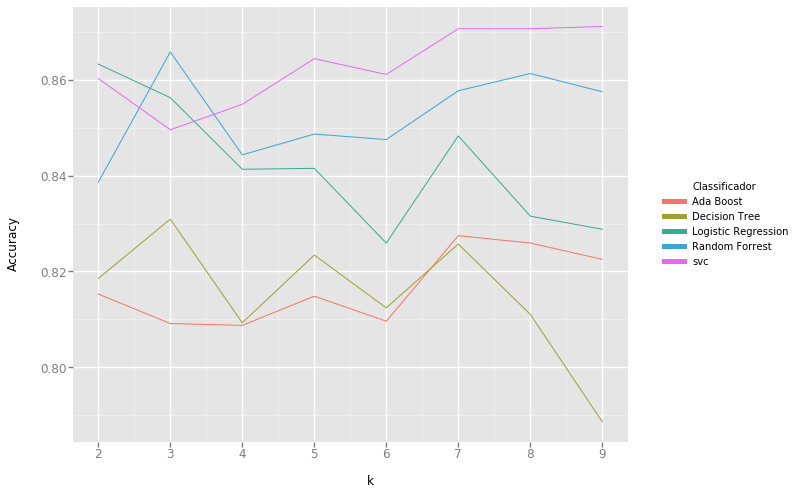

<ggplot: (21569445)>

In [36]:
p1


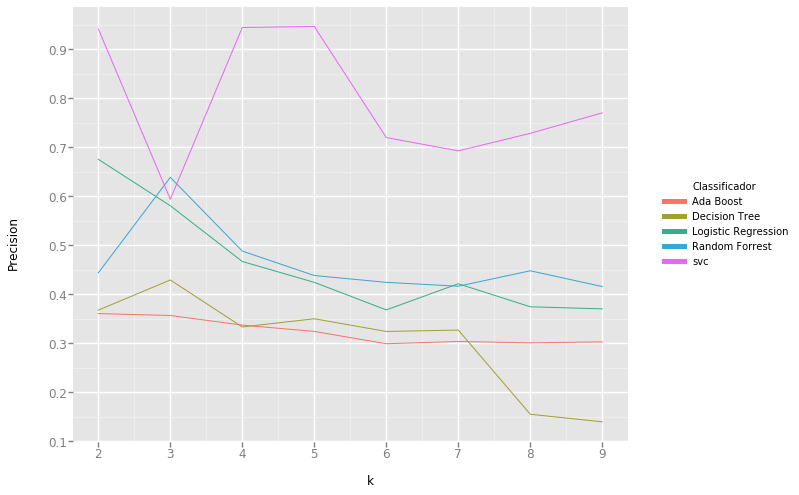

<ggplot: (21569459)>

In [37]:
p2

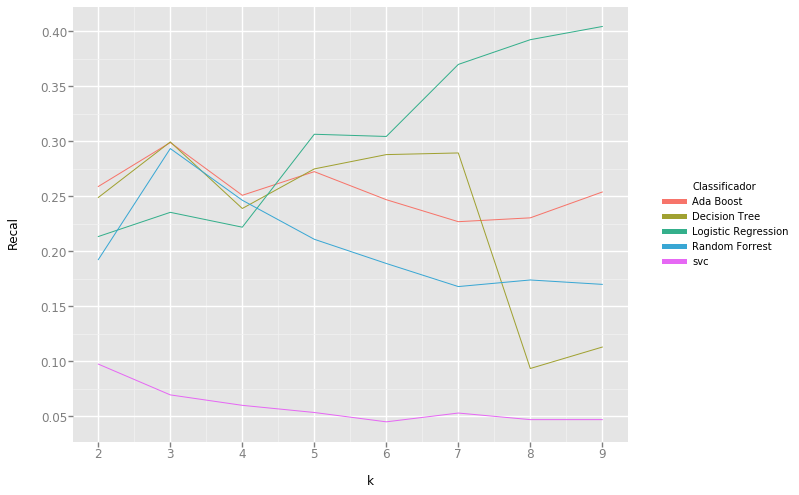

<ggplot: (21569471)>

In [38]:
p3

>Porém, eu não encontrei uma comparação entre o desempenho pro modelo final escolhido entre ele trabalhando com o conjunto original de features e o conjunto original + as suas novas features. Poderia adicionar essa comparação?

Novamente, idéia boa, porém não faz parte do escopo. Segue:

In [40]:
# teste com as features criadas
teste_logistic_regression()

In [41]:
print(tabela_teste)

+-------------------+---------------------+
|   Classificador   | Logistic Regression |
+-------------------+---------------------+
|      Accuracy     |    0.832066666667   |
+-------------------+---------------------+
|     Precision     |    0.380359612725   |
+-------------------+---------------------+
|       Recal       |        0.4125       |
+-------------------+---------------------+
|         f1        |    0.395778364116   |
+-------------------+---------------------+
|         f2        |    0.405644606156   |
+-------------------+---------------------+
| Total Predictions |        15000        |
+-------------------+---------------------+
|   true_positives  |         825         |
+-------------------+---------------------+
|  false Positives  |         1344        |
+-------------------+---------------------+
|  false Negatives  |         1175        |
+-------------------+---------------------+
|   true_negatives  |        11656        |
+-------------------+-----------

In [43]:
# teste sem as features criadas
features_list = p5aux.inicia_features_limpo()
teste_logistic_regression()

In [44]:
print(tabela_teste)

+-------------------+---------------------+---------------------+
|   Classificador   | Logistic Regression | Logistic Regression |
+-------------------+---------------------+---------------------+
|      Accuracy     |    0.832066666667   |    0.813466666667   |
+-------------------+---------------------+---------------------+
|     Precision     |    0.380359612725   |    0.314935064935   |
+-------------------+---------------------+---------------------+
|       Recal       |        0.4125       |        0.3395       |
+-------------------+---------------------+---------------------+
|         f1        |    0.395778364116   |    0.326756496631   |
+-------------------+---------------------+---------------------+
|         f2        |    0.405644606156   |    0.334285151635   |
+-------------------+---------------------+---------------------+
| Total Predictions |        15000        |        15000        |
+-------------------+---------------------+---------------------+
|   true_p

A primeira coluna mostra o classificador com as features criadas e a segunda sem as features. Nota-se em todos os indicadores a melhora com a criação da feature.

## Questões


>Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]

o objetivo deste projeto é no aprendizado de "machine Learning" utilizando os dados financeiros e de emails coletados durante a investigação e disponibilizado pelo curso. A partir desses dados construiu-se a partir de algoritimos de marchine learning (ML) um modelo preditivo para identificação de possiveis pessoas envolvidos na fraude, neste estudo simplificado como POI (pearson of Interest).
Resumidamente os dados possuem:
* 146 dados(linhas), cada linha representando uma pessoa. Foram retirados 2 linhas por ser o TOTAL e um não era uma pessoa.
* 18 eram POIs e 128 eram não POI (nPOI)
* Cada pessoa possui 21 atributos sendo 14 financeiros, 6 emails e 1 indicando se era POI ou não.

>What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that doesn’t come ready-made in the dataset--explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) If you used an algorithm like a decision tree, please also give the feature importances of the features that you use. [relevant rubric items: “create new features”, “properly scale features”, “intelligently select feature”]

Inicialmente foram retirados os outliers e retirado o atributo de email, que neste caso nao serve para modelo nenhum. Foram criados duas variáveis 'por_to_poi' e 'por_from_poi' que é a porcentagem de emails que são trocados entre os POIs. Neste caso, acredita-se que os POIs se comunicam com mais frequencia entre os POIs por eles fazerem parte do mesmo grupo de "criminosos".
Escalonou-se os atributos utilizando o algoritimo Min-max-scaler com o intuito de retirar os pesos dos mesmos. Rodado o algoritimo K-best notou-se que o atributo 'exercised_stock_options' possui a maior influencia no resultado.

>What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]

Foram testados os classificadors ada_boost, logistic Regression, suport vector classifier (SVC), Decision tree e o Random Forrest. Como basicamente o uso desses classificadores possuem a mesma lógica (inicialização e fit), utilizamos juntamente com esses classificadores o algoritimo GridSearch que retorna os melhores parametros para o classificador. O algoritimo Logistic Regression foi escolhido por possuir uma melhor combinação de precisão e recall. 


>What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric items: “discuss parameter tuning”, “tune the algorithm”]

O processo de ajuste (tunning) é quando se mudam os parametros do algoritimo para melhorar o desempenho de classificação. Um bom ajuste resulta em um melhor desempenho do classificador e uma melhor eficiencia nos resultados. Para ajustar os parametros foram utilizados o algoritmio GridSearchCV que faz inúmeros testes para achar os melhores parametros.


>What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric items: “discuss validation”, “validation strategy”]

Validação é o processo que determina a eficiencia do seu algoritimo, utilizado criterios de testes. Foi utilizado o Cross-validation quebrando os dados em 20-30% para testes e o restante para treino do classificador. Para esses testes foi utilizando o tester.py com uma pequena modificação para melhor visualização dos dados. Os algoritimos foram focados mais nos indicador 'recall' e 'precision', uma vez que os dois faziam parte do pré-requisito dos testes. 

>Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]


In [81]:
print(tabela_teste[1].get_string(fields=["Classificador",
                                      "Logistic Regression",
                                      "SVC",
                                     ]))


+---------------+---------------------+----------------+
| Classificador | Logistic Regression |      SVC       |
+---------------+---------------------+----------------+
|   Precision   |    0.418767507003   | 0.604651162791 |
+---------------+---------------------+----------------+


In [82]:
print(tabela_teste[2].get_string(fields=["Classificador",
                                      "Logistic Regression",
                                      "SVC",
                                     ]))

+---------------+---------------------+-------+
| Classificador | Logistic Regression |  SVC  |
+---------------+---------------------+-------+
|     Recal     |        0.4485       | 0.104 |
+---------------+---------------------+-------+


Vamos considerar o classificador SVC que possui um precision alta e um baixo recall, o que significa que o algoritimo tende a penalizar os falsos positivos em uma porcentagem maior que os falsos negativos. Apesar de termos mais certeza que quando o algoritimo classifica a pessoa como POI ser realmente um POI, alguns POIs reais ficarão fora da classificação. Usar um algoritimo com alto recall, ou seja, pessoas que não são POIs serem classificados como POI (false negatives) com mais frequencia pode ocorrer um maior trabalho para os investigadores. Eu iria na teoria de pegar os POIs em menor quantidade mas com qualidade (certeza de ser POI) pois com a delação premiada eles automaticamente entregariam os outros POIs. De acordo com a lei todos são inocentes até que provem ao contrario. Seria mais danoso classificar um inocente como culpado do que escapar um culpado, sendo que esse que escapou poderá ser dedurado pelo os que foram pego.


## Bibliografia
http://aka.ms/vcpython27
https://pypi.python.org/pypi/ggplot
http://scikit-learn.org/stable/modules/pipeline.html
http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook
http://data-blog.udacity.com/posts/2016/10/latex-primer/
http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
https://bugs.python.org/issue26434
https://stackoverflow.com/questions/22560768/add-multiple-line-in-python-single-table-cell
https://stackoverflow.com/questions/24365655/how-to-get-the-value-of-a-cell-when-using-prettytable
